In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import patsy
from patsy import dmatrix

In [3]:
## Load the data into a DataFrame
data = pd.read_csv('projects/weekly-projects/project-03/datasets/Iowa_Liquor_Sales_reduced.csv')

/Users/Driz/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [27]:
#need to reformat to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")

In [28]:
data['Date'].head()

0   2016-03-31
1   2016-03-31
2   2016-03-31
3   2016-03-31
4   2016-03-31
Name: Date, dtype: datetime64[ns]

In [11]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [21]:
data.dtypes
#shows which columns need to be changed into floats/ints

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [22]:
#need to change column types 
data['State Bottle Cost'] = data['State Bottle Cost'].str.replace('$', '').astype(float)

In [23]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '').astype(float)

In [24]:
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '').astype(float)

In [25]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


In [29]:
print data.describe()

       Store Number  County Number      Category  Vendor Number   Item Number  \
count  2.709552e+06   2.698639e+06  2.708773e+06   2.709552e+06  2.709552e+06   
mean   3.589071e+03   5.726086e+01  1.043826e+06   2.563901e+02  4.601624e+04   
std    9.491083e+02   2.732565e+01  5.003493e+04   1.408757e+02  5.311268e+04   
min    2.106000e+03   1.000000e+00  1.011100e+06   1.000000e+01  1.460000e+02   
25%    2.604000e+03            NaN           NaN   1.150000e+02  2.682800e+04   
50%    3.721000e+03            NaN           NaN   2.600000e+02  3.817600e+04   
75%    4.382000e+03            NaN           NaN   3.800000e+02  6.460100e+04   
max    9.023000e+03   9.900000e+01  1.701100e+06   9.780000e+02  9.992750e+05   

       Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
count        2.709552e+06       2.709552e+06         2.709552e+06   
mean         9.242111e+02       9.816209e+00         1.474012e+01   
std          5.464858e+02       1.490656e+01         2.235953e+

In [43]:
#shows some missing data for this column
#can see if county number could work
#need to have some way of identifying store number with its county
data['County'].isnull().value_counts()

False    2698639
True       10913
Name: County, dtype: int64

In [41]:
#still not gonna work unless I drop all stores that cannot be identifed with a county
data['County Number'].isnull().value_counts()

False    2698639
True       10913
Name: County Number, dtype: int64

In [44]:
#can still use city, or zip, but will have more work matching to its county
#looks complete
data['City'].isnull().value_counts()

False    2709552
Name: City, dtype: int64

In [47]:
#looks complete
data['Zip Code'].isnull().value_counts()

False    2709552
Name: Zip Code, dtype: int64

In [53]:
#are my other columns complete?
#tells you if there are missing data in column
data['Store Number'].isnull().any()

False

In [54]:
data['Sale (Dollars)'].isnull().any()

False

In [55]:
data['Volume Sold (Gallons)'].isnull().any()

False

In [56]:
data['Volume Sold (Liters)'].isnull().any()

False

In [57]:
data['Bottles Sold'].isnull().any()

False

In [58]:
data['State Bottle Retail'].isnull().any()

False

In [59]:
data['State Bottle Cost'].isnull().any()

False

In [60]:
data['Bottle Volume (ml)'].isnull().any()

False

In [61]:
#easier/quicker way than above to find the missing data
data.count()

Date                     2709552
Store Number             2709552
City                     2709552
Zip Code                 2709552
County Number            2698639
County                   2698639
Category                 2708773
Category Name            2703443
Vendor Number            2709552
Item Number              2709552
Item Description         2709552
Bottle Volume (ml)       2709552
State Bottle Cost        2709552
State Bottle Retail      2709552
Bottles Sold             2709552
Sale (Dollars)           2709552
Volume Sold (Liters)     2709552
Volume Sold (Gallons)    2709552
dtype: int64

In [ ]:
#need to identify by county so this is a problem
These columns contain missing data:
County Number            2698639
County                   2698639
Category                 2708773
Category Name            2703443

Need to decide how to deal with the missing data in county and county number columns. City and Zip Code columns are complete, but that doesnt mean they can easily be used to find the county each store resides in. It seems that out of 2.7 million rows of data that dropping 10,000 would be insignificant. 

In [63]:
data.shape

(2709552, 18)

In [52]:
len(data['Store Number'])

2709552

In [51]:
#need to see how many stores I am dealing with
#set will filter out duplicates
len(set(data['Store Number']))

1403

In [64]:
data.dropna()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,2.77
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,2.54
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,0.20
6,2016-03-31,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69636,Dr. Mcgillicuddy's Cherry Schnapps,750,8.67,13.01,4,52.04,3.00,0.79
7,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88294,Patron Silver Tequila,375,14.00,21.00,12,252.00,4.50,1.19
8,2016-03-31,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,259,52318,Christian Bros Brandy,1750,11.83,17.75,6,106.50,10.50,2.77
9,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,389,49185,Remy Martin Vsop (flask),375,10.66,15.99,12,191.88,4.50,1.19
10,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88296,Patron Tequila Silver,750,27.00,40.50,12,486.00,9.00,2.38


In [67]:
data.dropna().shape

(2692602, 18)

In [68]:
#by dropping nulls I am losing about 17,000 rows of data
2709552 - 2692602

16950

In [71]:
#dropping the data permenately 
data.dropna(inplace=True)

In [72]:
#will need to separate tables into year 2015 and 2016
#allows me to separate by 2015 and 2016
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [73]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Year', u'Month'],
      dtype='object')

In [99]:
#ok, need to exclude sales between Jan-Mar and turn into a column
jan_march_2015 = pd.pivot_table(data[((data['Year'] == 2015) & (data['Month'] <= 3))], 
                                   values=['Category', 'Bottle Volume (ml)', 'State Bottle Cost', 
                                           'State Bottle Retail', 
                                           'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 
                                           'Volume Sold (Gallons)'], 
                                   index=['Store Number', 'City', 'County'], aggfunc=np.sum)
jan_march_2015.reset_index(inplace=True)
jan_march_2015.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,CEDAR FALLS,Black Hawk,1085925,23316,1.267613e+09,337166.53,13284.93,19943.43,5764.04,21815.55
1,2113,GOWRIE,Webster,319625,1618,3.481712e+08,22351.86,3558.75,5342.48,423.73,1604.08
2,2130,WATERLOO,Black Hawk,869575,17707,9.724068e+08,277764.46,9668.05,14510.82,4273.60,16176.37
3,2152,ROCKWELL,Cerro Gordo,355500,1375,3.540854e+08,16805.11,2954.28,4440.29,373.65,1414.59
4,2178,WAUKON,Allamakee,556200,4279,5.616009e+08,54411.42,5160.06,7753.66,1156.12,4376.38


In [100]:
year_2015 = pd.pivot_table(data[(data['Year'] == 2015)], 
                           values=['Category', 'Bottle Volume (ml)', 'State Bottle Cost', 
                                   'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 
                                   'Volume Sold (Liters)', 'Volume Sold (Gallons)'], 
                           index= ['Store Number', 'City', 'County'], aggfunc=np.sum)
year_2015.reset_index(inplace=True)
year_2015.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,CEDAR FALLS,Black Hawk,4639675,99957,5.337783e+09,1433451.46,55019.19,82582.34,24823.51,93952.72
1,2113,GOWRIE,Webster,1313875,6483,1.415665e+09,85763.42,14469.12,21725.74,1717.17,6500.83
2,2130,WATERLOO,Black Hawk,3645525,72544,4.121103e+09,1107685.25,40541.36,60849.63,17316.93,65546.38
3,2152,ROCKWELL,Cerro Gordo,1513250,5928,1.492832e+09,72080.36,12311.88,18507.48,1628.42,6164.92
4,2178,WAUKON,Allamakee,2739775,20504,2.777045e+09,277987.96,26665.46,40070.07,5737.98,21719.49


In [101]:
#added Jan-Mar column as required
year_2015['Jan-March Sales (Dollars)'] = jan_march_2015['Sale (Dollars)']
year_2015.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Jan-March Sales (Dollars)
0,2106,CEDAR FALLS,Black Hawk,4639675,99957,5.337783e+09,1433451.46,55019.19,82582.34,24823.51,93952.72,337166.53
1,2113,GOWRIE,Webster,1313875,6483,1.415665e+09,85763.42,14469.12,21725.74,1717.17,6500.83,22351.86
2,2130,WATERLOO,Black Hawk,3645525,72544,4.121103e+09,1107685.25,40541.36,60849.63,17316.93,65546.38,277764.46
3,2152,ROCKWELL,Cerro Gordo,1513250,5928,1.492832e+09,72080.36,12311.88,18507.48,1628.42,6164.92,16805.11
4,2178,WAUKON,Allamakee,2739775,20504,2.777045e+09,277987.96,26665.46,40070.07,5737.98,21719.49,54411.42


In [102]:
#cant use a store that has no info for sales in Jan-Mar to predict the years sales
year_2015.isnull().any()

Store Number                 False
City                         False
County                       False
Bottle Volume (ml)           False
Bottles Sold                 False
Category                     False
Sale (Dollars)               False
State Bottle Cost            False
State Bottle Retail          False
Volume Sold (Gallons)        False
Volume Sold (Liters)         False
Jan-March Sales (Dollars)     True
dtype: bool

In [103]:
#need to get rid of null values for 'Jan-March Sales (Dollars)'
year_2015.dropna(inplace=True)

In [104]:
year_2015.isnull().any()

Store Number                 False
City                         False
County                       False
Bottle Volume (ml)           False
Bottles Sold                 False
Category                     False
Sale (Dollars)               False
State Bottle Cost            False
State Bottle Retail          False
Volume Sold (Gallons)        False
Volume Sold (Liters)         False
Jan-March Sales (Dollars)    False
dtype: bool

In [124]:
jan_march_2016 = pd.pivot_table(data[((data['Year'] == 2016) & (data['Month'] <= 3))], 
                                   values=['Category', 'Bottle Volume (ml)', 'State Bottle Cost', 
                                           'State Bottle Retail', 
                                           'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 
                                           'Volume Sold (Gallons)'], 
                                   index=['Store Number', 'City', 'County'], aggfunc=np.sum)
jan_march_2016.reset_index(inplace=True)
jan_march_2016.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,CEDAR FALLS,Black Hawk,1125075,23579,1.287243e+09,337446.81,12850.99,19282.87,5879.27,22252.45
1,2113,GOWRIE,Webster,369000,1701,4.086063e+08,21663.33,4132.16,6201.13,424.24,1606.32
2,2130,WATERLOO,Black Hawk,969925,19730,1.075590e+09,303978.69,10399.76,15603.80,4778.80,18088.75
3,2152,ROCKWELL,Cerro Gordo,229500,749,2.276214e+08,9307.75,2053.31,3085.95,211.07,799.39
4,2178,WAUKON,Allamakee,617275,4525,6.218486e+08,58749.04,6156.75,9243.32,1214.15,4596.14


In [125]:
year_2016 = pd.pivot_table(data[(data['Year'] == 2016)], 
                           values=['Category', 'Bottle Volume (ml)', 'State Bottle Cost', 
                                   'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 
                                   'Volume Sold (Liters)', 'Volume Sold (Gallons)'], 
                           index= ['Store Number', 'City', 'County'], aggfunc=np.sum)
year_2016.reset_index(inplace=True)
year_2016.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,CEDAR FALLS,Black Hawk,1125075,23579,1.287243e+09,337446.81,12850.99,19282.87,5879.27,22252.45
1,2113,GOWRIE,Webster,369000,1701,4.086063e+08,21663.33,4132.16,6201.13,424.24,1606.32
2,2130,WATERLOO,Black Hawk,969925,19730,1.075590e+09,303978.69,10399.76,15603.80,4778.80,18088.75
3,2152,ROCKWELL,Cerro Gordo,229500,749,2.276214e+08,9307.75,2053.31,3085.95,211.07,799.39
4,2178,WAUKON,Allamakee,617275,4525,6.218486e+08,58749.04,6156.75,9243.32,1214.15,4596.14


In [126]:
#added Jan-Mar column as required
year_2016['Jan-March Sales (Dollars)'] = jan_march_2016['Sale (Dollars)']
year_2016.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Jan-March Sales (Dollars)
0,2106,CEDAR FALLS,Black Hawk,1125075,23579,1.287243e+09,337446.81,12850.99,19282.87,5879.27,22252.45,337446.81
1,2113,GOWRIE,Webster,369000,1701,4.086063e+08,21663.33,4132.16,6201.13,424.24,1606.32,21663.33
2,2130,WATERLOO,Black Hawk,969925,19730,1.075590e+09,303978.69,10399.76,15603.80,4778.80,18088.75,303978.69
3,2152,ROCKWELL,Cerro Gordo,229500,749,2.276214e+08,9307.75,2053.31,3085.95,211.07,799.39,9307.75
4,2178,WAUKON,Allamakee,617275,4525,6.218486e+08,58749.04,6156.75,9243.32,1214.15,4596.14,58749.04


In [127]:
#cant use a store that has no info for sales in Jan-Mar to predict the years sales
year_2016.isnull().any()

Store Number                 False
City                         False
County                       False
Bottle Volume (ml)           False
Bottles Sold                 False
Category                     False
Sale (Dollars)               False
State Bottle Cost            False
State Bottle Retail          False
Volume Sold (Gallons)        False
Volume Sold (Liters)         False
Jan-March Sales (Dollars)    False
dtype: bool

Ok, I think I have the data frames I want to work with. I am now ready to start modeling. 

In [105]:
#follow this to begin modeling
X= year_2015[['State Bottle Cost', 'Jan-March Sales (Dollars)']]
y= year_2015['Sale (Dollars)']

In [106]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 
#to show some stuff
#for every one unit increase in X, y increases by 13.2835 (coefficient variable)
#which makes sense for every sale in Jan-March that sales would go up about the cost of one bottle

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1345.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          2.49e-315
Time:                        18:40:15   Log-Likelihood:                -18061.
No. Observations:                1282   AIC:                         3.613e+04
Df Residuals:                    1280   BIC:                         3.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
State Bottle Cost            13.2439      0.369     35.895      0.000        12.520    13.968
Jan-March Sales (Dollars)     0.7808      0.084      9.263      0.000         0.615     0.946
==============================================================================
Omnibus:                     2020.748   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168380.704
Skew:                           9.564   Prob(JB):                         0.00
Kurtosis:                     149.653   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r^2: 0.677573449473


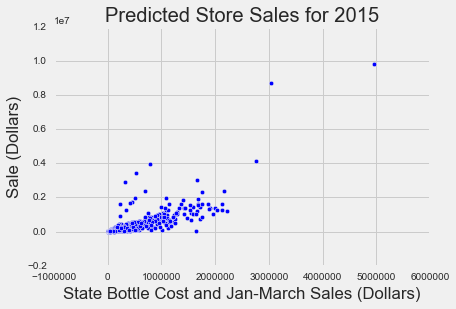

In [107]:
# Plot the data and the best fit line
# The line / model
plt.style.use('fivethirtyeight')
plt.scatter(predictions, y)
plt.title('Predicted Store Sales for 2015')
plt.ylabel("Sale (Dollars)")
plt.xlabel("State Bottle Cost and Jan-March Sales (Dollars)");

# Statsmodels 
print "r^2:", model.rsquared

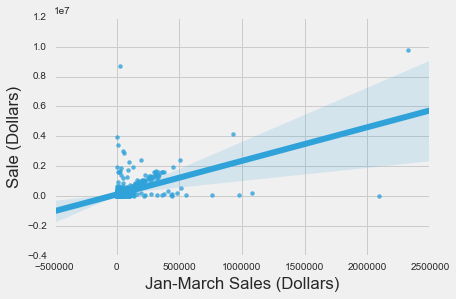

In [108]:
#another visualization
sns.regplot(x='Jan-March Sales (Dollars)', y='Sale (Dollars)', data=year_2015);

In [109]:
#this combo has a pretty bad r2
#seems as if neither predict yearly sales well
X= year_2015[['Store Number', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     379.9
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          3.01e-130
Time:                        18:59:56   Log-Likelihood:                -18488.
No. Observations:                1282   AIC:                         3.698e+04
Df Residuals:                    1280   BIC:                         3.699e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 19.4192      3.081      6.303      0.000        13.375    25.464
Jan-March Sales (Dollars)     2.3595      0.100     23.552      0.000         2.163     2.556
==============================================================================
Omnibus:                     1684.322   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1012791.385
Skew:                           6.525   Prob(JB):                         0.00
Kurtosis:                     140.076   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
X= year_2015[['Bottle Volume (ml)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1124.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          1.43e-282
Time:                        19:00:25   Log-Likelihood:                -18137.
No. Observations:                1282   AIC:                         3.628e+04
Df Residuals:                    1280   BIC:                         3.629e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)            0.1409      0.004     31.669      0.000         0.132     0.150
Jan-March Sales (Dollars)     0.9036      0.089     10.126      0.000         0.729     1.079
==============================================================================
Omnibus:                     2114.223   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1528806.370
Skew:                          10.424   Prob(JB):                         0.00
Kurtosis:                     170.886   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#notice the perfect R2 score. This is a throw out.
#it shows that totals sales predicts total sales
X= year_2015[['Sale (Dollars)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.271e+33
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:00:42   Log-Likelihood:                 25932.
No. Observations:                1282   AIC:                        -5.186e+04
Df Residuals:                    1280   BIC:                        -5.185e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Sale (Dollars)                1.0000   2.47e-17   4.06e+16      0.000         1.000     1.000
Jan-March Sales (Dollars) -3.331e-16   1.06e-16     -3.140      0.002     -5.41e-16 -1.25e-16
==============================================================================
Omnibus:                     2125.138   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1555338.250
Skew:                          10.536   Prob(JB):                         0.00
Kurtosis:                     172.331   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X= year_2015[['State Bottle Retail', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1344.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          3.17e-315
Time:                        19:01:09   Log-Likelihood:                -18062.
No. Observations:                1282   AIC:                         3.613e+04
Df Residuals:                    1280   BIC:                         3.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
State Bottle Retail           8.8178      0.246     35.882      0.000         8.336     9.300
Jan-March Sales (Dollars)     0.7811      0.084      9.265      0.000         0.616     0.947
==============================================================================
Omnibus:                     2021.013   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1169277.563
Skew:                           9.566   Prob(JB):                         0.00
Kurtosis:                     149.710   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#this shows a good R2
X= year_2015[['Volume Sold (Gallons)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.052e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:01:23   Log-Likelihood:                -15979.
No. Observations:                1282   AIC:                         3.196e+04
Df Residuals:                    1280   BIC:                         3.197e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Volume Sold (Gallons)        59.8375      0.235    254.789      0.000        59.377    60.298
Jan-March Sales (Dollars)    -0.0358      0.017     -2.125      0.034        -0.069    -0.003
==============================================================================
Omnibus:                     1199.843   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156453.640
Skew:                           3.866   Prob(JB):                         0.00
Kurtosis:                      56.564   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#same R2 as 'Volume Sold (Gallons)', could be same measure just different units
X= year_2015[['Volume Sold (Liters)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.049e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:01:37   Log-Likelihood:                -15979.
No. Observations:                1282   AIC:                         3.196e+04
Df Residuals:                    1280   BIC:                         3.197e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Volume Sold (Liters)         15.8085      0.062    254.711      0.000        15.687    15.930
Jan-March Sales (Dollars)    -0.0358      0.017     -2.123      0.034        -0.069    -0.003
==============================================================================
Omnibus:                     1199.339   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156251.999
Skew:                           3.863   Prob(JB):                         0.00
Kurtosis:                      56.530   Cond. No.                         4.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#again, this is invalid because 'Sale (Dollars)' perfectly predicts itself
X= year_2015[['Store Number', 'Bottle Volume (ml)', 'Sale (Dollars)',
        'State Bottle Cost',  'State Bottle Retail', 'Volume Sold (Gallons)',
        'Volume Sold (Liters)',  'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.227e+28
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:01:56   Log-Likelihood:                 19421.
No. Observations:                1282   AIC:                        -3.883e+04
Df Residuals:                    1274   BIC:                        -3.878e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number               2.021e-14   5.12e-13      0.039      0.969     -9.84e-13  1.02e-12
Bottle Volume (ml)         1.249e-16   8.85e-15      0.014      0.989     -1.72e-14  1.75e-14
Sale (Dollars)                1.0000   4.76e-14    2.1e+13      0.000         1.000     1.000
State Bottle Cost         -1.819e-12   2.44e-10     -0.007      0.994     -4.81e-10  4.77e-10
State Bottle Retail        2.274e-12   1.63e-10      0.014      0.989     -3.17e-10  3.21e-10
Volume Sold (Gallons)      3.638e-12   1.56e-09      0.002      0.998     -3.06e-09  3.07e-09
Volume Sold (Liters)      -4.547e-13   4.12e-10     -0.001      0.999     -8.09e-10  8.09e-10
Jan-March Sales (Dollars)   2.22e-16   1.77e-14      0.013      0.990     -3.46e-14   3.5e-14
==============================================================================
Omnibus:                     1218.902   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59681.135
Skew:                          -4.381   Prob(JB):                         0.00
Kurtosis:                      35.257   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
#this has a good r2, but is it too fit?
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Volume Sold (Gallons)',
              'Volume Sold (Liters)',  'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.027e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:02:13   Log-Likelihood:                -15324.
No. Observations:                1282   AIC:                         3.066e+04
Df Residuals:                    1275   BIC:                         3.070e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                  0.0829      0.301      0.275      0.783        -0.509     0.674
Bottle Volume (ml)           -0.1103      0.004    -26.277      0.000        -0.119    -0.102
State Bottle Cost          1075.5881    140.488      7.656      0.000       799.974  1351.202
State Bottle Retail        -710.1595     93.694     -7.580      0.000      -893.971  -526.348
Volume Sold (Gallons)      1066.8058    918.712      1.161      0.246      -735.547  2869.158
Volume Sold (Liters)       -266.0123    242.704     -1.096      0.273      -742.156   210.131
Jan-March Sales (Dollars)     0.0261      0.010      2.509      0.012         0.006     0.047
==============================================================================
Omnibus:                      663.032   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180289.938
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                      61.048   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Volume Sold (Gallons)',
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.697e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:05:29   Log-Likelihood:                -15324.
No. Observations:                1282   AIC:                         3.066e+04
Df Residuals:                    1276   BIC:                         3.069e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                  0.1240      0.299      0.414      0.679        -0.463     0.711
Bottle Volume (ml)           -0.1116      0.004    -27.837      0.000        -0.119    -0.104
State Bottle Cost          1075.4841    140.500      7.655      0.000       799.849  1351.120
State Bottle Retail        -710.0012     93.702     -7.577      0.000      -893.827  -526.175
Volume Sold (Gallons)        59.8653      0.222    269.246      0.000        59.429    60.302
Jan-March Sales (Dollars)     0.0260      0.010      2.494      0.013         0.006     0.046
==============================================================================
Omnibus:                      657.194   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180452.862
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                      61.077   Cond. No.                     4.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     724.7
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:05:49   Log-Likelihood:                -17925.
No. Observations:                1282   AIC:                         3.586e+04
Df Residuals:                    1277   BIC:                         3.589e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 -6.5996      2.266     -2.913      0.004       -11.045    -2.154
Bottle Volume (ml)            0.0319      0.030      1.056      0.291        -0.027     0.091
State Bottle Cost          1.351e+04   1008.491     13.400      0.000      1.15e+04  1.55e+04
State Bottle Retail       -8992.1711    672.711    -13.367      0.000     -1.03e+04 -7672.430
Jan-March Sales (Dollars)     0.8096      0.076     10.649      0.000         0.660     0.959
==============================================================================
Omnibus:                     1509.157   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           303998.859
Skew:                           5.673   Prob(JB):                         0.00
Kurtosis:                      77.581   Cond. No.                     3.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     756.1
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:06:21   Log-Likelihood:                -18009.
No. Observations:                1282   AIC:                         3.603e+04
Df Residuals:                    1278   BIC:                         3.605e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 -1.9944      2.390     -0.834      0.404        -6.683     2.695
Bottle Volume (ml)           -0.2333      0.024     -9.597      0.000        -0.281    -0.186
State Bottle Cost            33.5715      2.096     16.020      0.000        29.460    37.683
Jan-March Sales (Dollars)     0.8130      0.081     10.020      0.000         0.654     0.972
==============================================================================
Omnibus:                     1702.720   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           544963.590
Skew:                           6.949   Prob(JB):                         0.00
Kurtosis:                     103.045   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
#deleted 'Store Number' this round. Seems to have no effect...
X= year_2015[['Bottle Volume (ml)','State Bottle Cost',  
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1008.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:06:41   Log-Likelihood:                -18009.
No. Observations:                1282   AIC:                         3.602e+04
Df Residuals:                    1279   BIC:                         3.604e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)           -0.2398      0.023    -10.418      0.000        -0.285    -0.195
State Bottle Cost            34.0196      2.025     16.796      0.000        30.046    37.993
Jan-March Sales (Dollars)     0.8092      0.081      9.990      0.000         0.650     0.968
==============================================================================
Omnibus:                     1710.673   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           552436.736
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                     103.725   Cond. No.                         620.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#this looks like a good combo to me!
#but is it too good...
X= year_2015[['Bottle Volume (ml)','State Bottle Cost',  
              'Volume Sold (Gallons)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.736e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:06:56   Log-Likelihood:                -15354.
No. Observations:                1282   AIC:                         3.072e+04
Df Residuals:                    1278   BIC:                         3.074e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)           -0.1300      0.003    -44.386      0.000        -0.136    -0.124
State Bottle Cost            10.7738      0.268     40.141      0.000        10.247    11.300
Volume Sold (Gallons)        60.4076      0.215    281.392      0.000        59.986    60.829
Jan-March Sales (Dollars)     0.0201      0.011      1.897      0.058        -0.001     0.041
==============================================================================
Omnibus:                      572.932   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163910.001
Skew:                           0.814   Prob(JB):                         0.00
Kurtosis:                      58.370   Cond. No.                         691.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

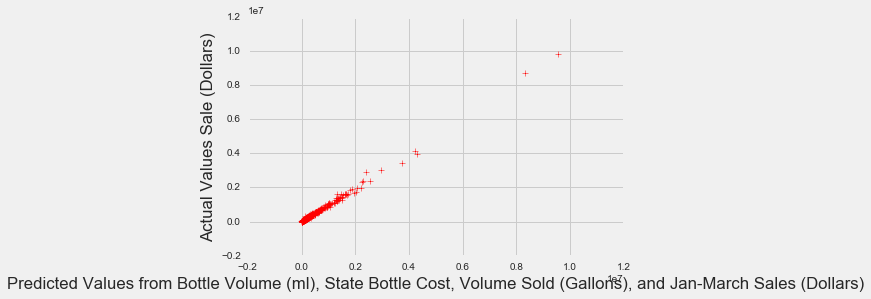

MSE: 9.99790469465e+13


In [122]:
#Let's plot the predictions versus the actual values.
#shows mean standard error
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Bottle Volume (ml), State Bottle Cost, Volume Sold (Gallons), and Jan-March Sales (Dollars)")
plt.ylabel("Actual Values Sale (Dollars)")
plt.show()
print "MSE:", model.mse_model
#is this model to 'fit'?

Ok, now I want to model this against my 2016 table to try and predict yearly sales

In [130]:
year_2016.head()

,Store Number,City,County,Bottle Volume (ml),Bottles Sold,Category,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Jan-March Sales (Dollars)
0,2106,CEDAR FALLS,Black Hawk,1125075,23579,1.287243e+09,337446.81,12850.99,19282.87,5879.27,22252.45,337446.81
1,2113,GOWRIE,Webster,369000,1701,4.086063e+08,21663.33,4132.16,6201.13,424.24,1606.32,21663.33
2,2130,WATERLOO,Black Hawk,969925,19730,1.075590e+09,303978.69,10399.76,15603.80,4778.80,18088.75,303978.69
3,2152,ROCKWELL,Cerro Gordo,229500,749,2.276214e+08,9307.75,2053.31,3085.95,211.07,799.39,9307.75
4,2178,WAUKON,Allamakee,617275,4525,6.218486e+08,58749.04,6156.75,9243.32,1214.15,4596.14,58749.04


In [133]:
X= year_2016[['Bottle Volume (ml)','State Bottle Cost',  
              'Volume Sold (Gallons)', 'Jan-March Sales (Dollars)']]
y= year_2016["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.225e+32
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:33:29   Log-Likelihood:                 27509.
No. Observations:                1290   AIC:                        -5.501e+04
Df Residuals:                    1286   BIC:                        -5.499e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)         1.874e-16    5.9e-17      3.177      0.002      7.17e-17  3.03e-16
State Bottle Cost           1.51e-14   5.12e-15      2.950      0.003      5.06e-15  2.51e-14
Volume Sold (Gallons)     -2.842e-14   2.18e-14     -1.306      0.192     -7.11e-14  1.43e-14
Jan-March Sales (Dollars)     1.0000   3.56e-16   2.81e+15      0.000         1.000     1.000
==============================================================================
Omnibus:                      707.563   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91977.059
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                      44.253   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r^2: 1.0


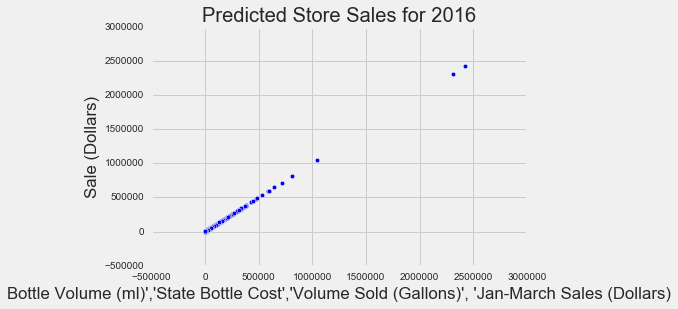

In [135]:
# Plot the data and the best fit line
# The line / model
plt.style.use('fivethirtyeight')
plt.scatter(predictions, y)
plt.title('Predicted Store Sales for 2016')
plt.ylabel("Sale (Dollars)")
plt.xlabel("Bottle Volume (ml)','State Bottle Cost','Volume Sold (Gallons)', 'Jan-March Sales (Dollars)");

# Statsmodels 
print "r^2:", model.rsquared

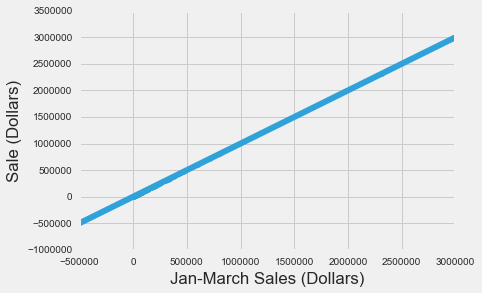

In [138]:
#another visualization
sns.regplot(x='Jan-March Sales (Dollars)', y='Sale (Dollars)', data=year_2016);

The r2 of 1.0 makes me weary of whether these variables were a good choice or if they are over fit. 

In [141]:
#wanted to evaluate for model fit
xs = [X for (X, y) in year_2016]
ys = [y for (X, y) in year_2016]

ValueError: too many values to unpack

In [140]:
coef = np.polyfit(xs, ys, deg=2)
# polyvals gives us the polynomial function for these coefficients
predictions = np.polyval(coef, xs)

#plot the model
plt.scatter(xs, ys)
plt.plot(xs, predictions)

NameError: name 'xs' is not defined

In [144]:
target = year_2016['Sale (Dollars)']

In [145]:
target.head()

0    337446.81
1     21663.33
2    303978.69
3      9307.75
4     58749.04
Name: Sale (Dollars), dtype: float64

In [147]:
y = target

In [148]:
X_train, X_test, y_train, y_test = train_test_split(year_2016, y, test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

NameError: name 'train_test_split' is not defined

In [149]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [153]:
# Perform 6-fold cross validation

scores = cross_val_score(Bottle Volume (ml), State Bottle Cost,  
               Volume Sold (Gallons), Jan-March Sales (Dollars), y, cv=6)
print "Cross-validated scores:", scores

SyntaxError: invalid syntax (<ipython-input-153-580ae1f6180e>, line 3)

In [156]:
fifty_fifty = []
for i in range(len):
    x_train, x_test, y_train, y_test = train_test_split(year_2016, y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print np.mean(fifty_fifty), np.std(fifty_fifty)

TypeError: range() integer end argument expected, got builtin_function_or_method.